# Статистический анализ двух бинарных выборок

## 📊 Условие задачи

### Исходные данные:
- **Две бинарные выборки** с вероятностями успеха:
  - $p_1 = 0.35$ (первая выборка)
  - $p_2 = 0.40$ (вторая выборка)
- **Уровень значимости**: $\alpha = 0.05$ (p-value)
- **Минимальный детектируемый эффект (MDE)**: $\delta = |p_2 - p_1| = 0.05$

### Поставленные задачи:

#### 1. 📈 Определение минимального размера выборки
**Цель**: Найти минимальное количество элементов $n$ в каждой выборке, необходимое для детекции MDE с заданной мощностью теста ($1 - \beta = 0.8$).

**Формула для расчета**:
$$
n = \frac{(z_{1-\alpha/2} \cdot \sqrt{2 \cdot \bar{p} \cdot (1-\bar{p})} + z_{1-\beta} \cdot \sqrt{p_1(1-p_1) + p_2(1-p_2)})^2}{(p_1 - p_2)^2}
$$

где:
- $\bar{p} = \frac{p_1 + p_2}{2}$ - объединенная пропорция
- $z_{1-\alpha/2}$ - квантиль нормального распределения для двустороннего теста
- $z_{1-\beta}$ - квантиль нормального распределения для мощности теста

#### 2. 🔄 Преобразование распределений через ЦПТ
**Цель**: Используя Центральную Предельную Теорему (ЦПТ), преобразовать биномиальные распределения к нормальным.

**Формулы преобразования**:
- Для выборки размера $n$ с вероятностью $p$:
  $$
  \text{Среднее: } \mu = p
  $$
  $$
  \text{Стандартное отклонение: } \sigma = \sqrt{\frac{p(1-p)}{n}}
  $$
- Получаем нормальные распределения:
  - Первая выборка: $N(\mu_1, \sigma_1)$
  - Вторая выборка: $N(\mu_2, \sigma_2)$

#### 3. 📊 Визуализация распределений и ошибок
**Требуется построить два графика**:

**График 1**: Двусторонняя альтернатива
- Распределения обеих выборок
- Критические области для ошибки I рода ($\alpha$)
- Область ошибки II рода ($\beta$)

**График 2**: Односторонняя альтернатива ($p_1 > p_2$)
- Распределения обеих выборок  
- Односторонние критические области
- Соответствующие области ошибок

**Обозначения на графиках**:
- 🟦 **Синяя область** - Ошибка I рода (вероятность $\alpha$)
- 🟥 **Красная область** - Ошибка II рода (вероятность $\beta$)
- 📍 **Вертикальные линии** - Критические значения и средние

#### 4. 📐 Расчет доверительных интервалов
**Цель**: Построить $95\%$ доверительные интервалы для средних значений обеих выборок.

**Формула доверительного интервала**:
$$
CI = \hat{p} \pm z_{1-\alpha/2} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

где:
- $\hat{p}$ - выборочная пропорция
- $z_{1-\alpha/2}$ - квантиль стандартного нормального распределения

### 🎯 Ожидаемые результаты:

1. **Числовой результат**: Минимальный размер выборки $n$
2. **Параметры распределений**: $\mu_1, \sigma_1, \mu_2, \sigma_2$
3. **Визуализация**: Два графика с областями статистических ошибок
4. **Интервальные оценки**: Доверительные интервалы для $p_1$ и $p_2$

### 📈 Статистические гипотезы:

**Для двустороннего теста**:
$$
H_0: p_1 = p_2 \\
H_1: p_1 \neq p_2
$$

**Для одностороннего теста**:
$$
H_0: p_1 \leq p_2 \\
H_1: p_1 > p_2
$$

In [14]:
# Импортируем все необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [17]:
# Исходные данные
p1 = 0.35
p2 = 0.40
alpha = 0.05
power = 0.8

# 1. Определим минимальный размер выборки

# Квантили нормального распределения
z_alpha = norm.ppf(1 - alpha/2)  # двусторонний тест
z_beta = norm.ppf(power)

# Расчет
p_avg = (p1 + p2) / 2

# Стандартная ошибка разницы, если нулевая гипотеза Н0 верна:
std_error_h0 = math.sqrt(2 * p_avg * (1 - p_avg))
# Стандартная ошибка разницы, если альтернативная гипотеза Н1 верна:
std_error_h1 = math.sqrt(p1 * (1 - p1) + p2 * (1 - p2))

n = (z_alpha * std_error_h0 + z_beta * std_error_h1) ** 2 / ((p1-p2)**2)

# Выведем результат, округлив в большую сторону до целого числа:
print(f"\nМинимальный размер каждой выборки: {math.ceil(n)}")





Минимальный размер каждой выборки: 1471


In [18]:
# 2. Используя Центральную Предельную Теорему (ЦПТ), 
# преобразуем биномиальные распределения к нормальным.

# Для первой выборки:
mu1 = p1
sigma1 = np.sqrt(p1 * (1 - p1) / n)

# Для второй выборки:
mu2 = p2
sigma2 = np.sqrt(p2 * (1 - p2) / n)

print("Первая выборка (преобразование к N):")
print(f"  N(μ₁={mu1:.2f}, σ₁={sigma1:.4f})")

print("\nВторая выборка (преобразование к N):")
print(f"  N(μ₂={mu2:.2f}, σ₂={sigma2:.4f})")


Первая выборка (преобразование к N):
  N(μ₁=0.35, σ₁=0.0124)

Вторая выборка (преобразование к N):
  N(μ₂=0.40, σ₂=0.0128)


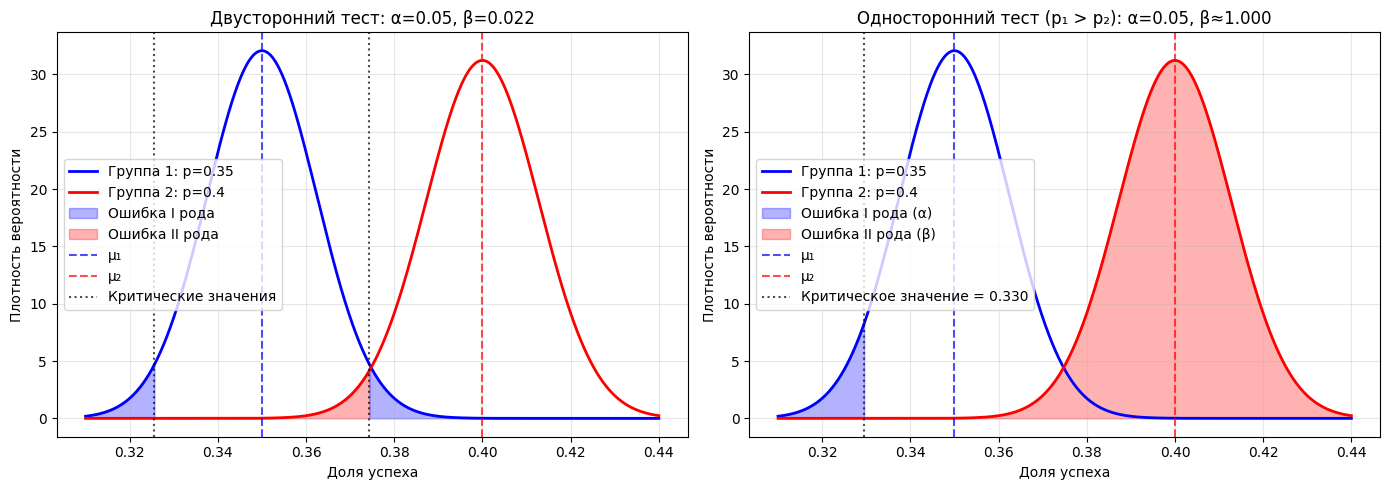

In [19]:
# 3. Визуализируем распределения и ошибки
# Критические значения для двустороннего теста
z_crit_2 = norm.ppf(1 - alpha/2)
critical_left = mu1 - z_crit_2 * sigma1
critical_right = mu1 + z_crit_2 * sigma1

# Критическое значение для одностороннего теста (p1 > p2)
z_crit_1 = norm.ppf(1 - alpha)
critical_1 = mu1 - z_crit_1 * sigma1  # Левая критическая область

# Диапазон для графика 
# x_min и x_max определили эмпирически таким образом, чтобы визуализация была информативна
x_min = 0.31 
x_max = 0.44
x = np.linspace(x_min, x_max, 1000)
y1 = norm.pdf(x, mu1, sigma1)
y2 = norm.pdf(x, mu2, sigma2)

# График 1: для двустороннего теста
plt.figure(figsize=(14, 5))

# Распределения:
plt.subplot(1, 2, 1)
plt.plot(x, y1, 'b-', label=f'Группа 1: p={p1}', linewidth=2)
plt.plot(x, y2, 'r-', label=f'Группа 2: p={p2}', linewidth=2)

# Критические области (ошибка I рода) - синяя заливка
x_crit_left = x[x <= critical_left]
x_crit_right = x[x >= critical_right]
plt.fill_between(x_crit_left, norm.pdf(x_crit_left, mu1, sigma1), 
                 alpha=0.3, color='blue', label='Ошибка I рода')
plt.fill_between(x_crit_right, norm.pdf(x_crit_right, mu1, sigma1), 
                 alpha=0.3, color='blue')

# Область ошибки II рода - красная заливка
x_beta_region = x[(x >= critical_left) & (x <= critical_right)]
y2_beta = norm.pdf(x_beta_region, mu2, sigma2)
plt.fill_between(x_beta_region, y2_beta, 
                 alpha=0.3, color='red', label='Ошибка II рода')

# Вертикальные линии
plt.axvline(mu1, color='blue', linestyle='--', alpha=0.7, label='μ₁')
plt.axvline(mu2, color='red', linestyle='--', alpha=0.7, label='μ₂')
plt.axvline(critical_left, color='black', linestyle=':', alpha=0.7, label='Критические значения')
plt.axvline(critical_right, color='black', linestyle=':', alpha=0.7)

beta_value = norm.cdf(critical_right, mu2, sigma2) - norm.cdf(critical_left, mu2, sigma2)
plt.title(f'Двусторонний тест: α={alpha}, β={beta_value:.3f}')
plt.xlabel('Доля успеха')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(alpha=0.3)

# График 2: для одностороннего теста (гипотеза p1>p2)
plt.subplot(1, 2, 2)
plt.plot(x, y1, 'b-', label=f'Группа 1: p={p1}', linewidth=2)
plt.plot(x, y2, 'r-', label=f'Группа 2: p={p2}', linewidth=2)

# Критическая область (ошибка I рода)
x_crit_one_side = x[x <= critical_1]
plt.fill_between(x_crit_one_side, norm.pdf(x_crit_one_side, mu1, sigma1), 
                 alpha=0.3, color='blue', label='Ошибка I рода (α)')

# Ошибка II рода 
x_beta_one = x[x > critical_1]
plt.fill_between(x_beta_one, norm.pdf(x_beta_one, mu2, sigma2), 
                 alpha=0.3, color='red', label='Ошибка II рода (β)')

# Вертикальные линии
plt.axvline(mu1, color='blue', linestyle='--', alpha=0.7, label='μ₁')
plt.axvline(mu2, color='red', linestyle='--', alpha=0.7, label='μ₂')
plt.axvline(critical_1, color='black', linestyle=':', alpha=0.7, 
            label=f'Критическое значение = {critical_1:.3f}')

beta_one_2 = 1 - norm.cdf(critical_1, mu2, sigma2)
plt.title(f'Односторонний тест (p₁ > p₂): α={alpha}, β≈{beta_one_2:.3f}')
plt.xlabel('Доля успеха')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()




На графике одностороннего тесты мы видим, что ошибка второго рода находится почти под всей кривой p2 (β ≈ 1). Это говорит о том, что если бы гипотеза H1 была бы верна, мы бы почти со 100% вероятностью этого не обнаружили. Причина - фактические данные говорят о том, что p1<p2, но не p1>p2. Мы же проверям гипотезу, которая не соответствует наблюдаемым данным. В данном случае корректнее было бы проверять H1: p1<p2. 
Построим график для этой гипотезы.

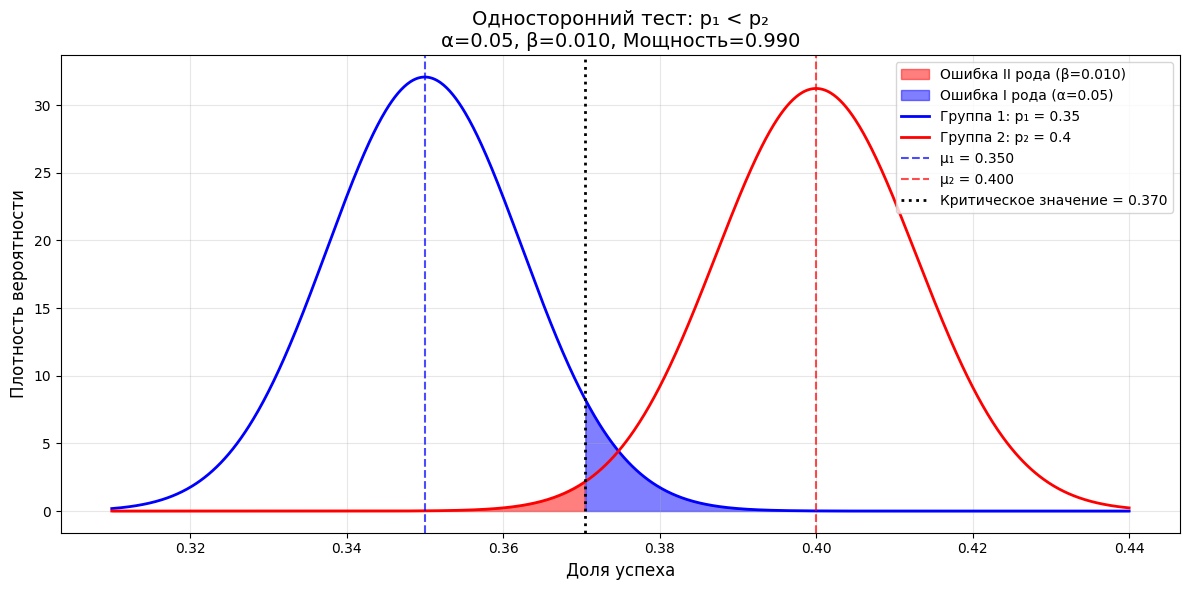

In [20]:
#График для одностороннего теста (проверяем H1: p1 < p2)
# Критическое значение для одностороннего теста (p₁ < p₂)
critical_1_r = mu1 + z_crit_1 * sigma1  # правая критическая область

# Расчет вероятностей ошибок
beta_2 = norm.cdf(critical_1_r, mu2, sigma2)
power_2 = 1 - beta_2

# Визуализация

x = np.linspace(x_min, x_max, 1000)
pdf1 = norm.pdf(x, mu1, sigma1)  # распределение p₁
pdf2 = norm.pdf(x, mu2, sigma2)  # распределение p₂

plt.figure(figsize=(12, 6))

# Ошибка II рода (β)
plt.fill_between(x[x <= critical_1_r], pdf2[x <= critical_1_r], 
                 alpha=0.5, color='red', label=f'Ошибка II рода (β={beta_2:.3f})')

# Ошибка I рода (α)
plt.fill_between(x[x > critical_1_r], pdf1[x > critical_1_r], 0,
                 alpha=0.5, color='blue', label=f'Ошибка I рода (α={alpha})')

# Рисуем линии распределений поверх
plt.plot(x, pdf1, 'b-', linewidth=2, label=f'Группа 1: p₁ = {p1}')
plt.plot(x, pdf2, 'r-', linewidth=2, label=f'Группа 2: p₂ = {p2}')

# Вертикальные линии
plt.axvline(mu1, color='blue', linestyle='--', alpha=0.7, label=f'μ₁ = {mu1:.3f}')
plt.axvline(mu2, color='red', linestyle='--', alpha=0.7, label=f'μ₂ = {mu2:.3f}')
plt.axvline(critical_1_r, color='black', linestyle=':', linewidth=2,
            label=f'Критическое значение = {critical_1_r:.3f}')


plt.title(f'Односторонний тест: p₁ < p₂\nα={alpha}, β={beta_2:.3f}, Мощность={power_2:.3f}', fontsize=14)
plt.xlabel('Доля успеха', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Тест с формулировкой гипезы H1: p1 < p2 выглядит корректным. Мощность 0.99 означает, что у теста есть хорошая способность обнаружить разницу, если она есть.

Замечание: мы использовали n = 1 471, определенное для двустороннего теста. При том же уровне альфа для одностороннего теста мощность получается выше заданной в условии для двустороннего теста (0.8). Если мы хотим получить мощность 0.8 для одностороннего теста, то нужно пересчитать n. Однако в задании этого не требуется (явно не написано). Поэтому оставляем n, рассчитанное в пункте 1 задачи.

In [21]:
# 4. Построим 95% CI для средних значений обеих выборок
#критическое значение z и стандартное отклонение для обеих выборок было рассчитано ранее
ci1_lower = p1 - z_crit_2 * sigma1
ci1_upper = p1 + z_crit_2 * sigma1

ci2_lower = p2 - z_crit_2 * sigma2
ci2_upper = p2 + z_crit_2 * sigma2


print(f"Группа 1 (p₁ = {p1}):")
print(f"  Доверительный интервал: [{ci1_lower:.4f}, {ci1_upper:.4f}]")

print(f"\nГруппа 2 (p₂ = {p2}):")
print(f"  Доверительный интервал: [{ci2_lower:.4f}, {ci2_upper:.4f}]")



Группа 1 (p₁ = 0.35):
  Доверительный интервал: [0.3256, 0.3744]

Группа 2 (p₂ = 0.4):
  Доверительный интервал: [0.3750, 0.4250]


Важное наблюдение: ДИ для средних двух выборок не перекрываются. Это говорит о статистически значимой разнице между двумя выборками на уровне 5% (альфа = 0.05)